# Consigna

En este proyecto profundizarás lo desarrollado en el proyecto 01. El objetivo es aplicar las técnicas incorporadas.(Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

#El trabajo se organiza en tres partes:

# PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

- Detección y eliminación de Outliers
- Encoding
- Imputación de valores faltantes
- Escalado de datos
- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, **el árbol de decisión** - con este nuevo dataset transformado. **Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos**. ¿Hay una mejora en su desempeño? *Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.*

# PARTE B - Modelos Avanzados

1. Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
2. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
3. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

# PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

- ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
- ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

# DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA


In [2]:
prop_data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
prop_data.head()


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


# PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

- Detección y eliminación de Outliers
- Encoding
- Imputación de valores faltantes
- Escalado de datos
- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

In [3]:
#comenzamos con esta cantida de instancias
prop_data.shape

(146660, 19)

Filtro del dataset

In [4]:
CABA1=prop_data[prop_data.l2=='Capital Federal']
CABA1.shape

(92539, 19)

In [5]:
CABA_idx=CABA1.set_index('property_type')
CABA_idx.shape

(92539, 18)

In [6]:
capfed=CABA_idx.loc[['Departamento','PH','Casa']]
capfed.shape

(91485, 18)

In [7]:
capfed.reset_index(level=0,inplace=True)
capfed.shape

(91485, 19)

In [8]:
#Filtramos zona y tipo de propiedad con mayor cantidad de propiedades
#ciudad_donde_hay_mas_propiedades = prop_data.l2.value_counts().idxmax()
#property_type_max = list(prop_data.property_type.value_counts().nlargest(3).index)

In [9]:
#Filtramos zonas con mas propiedades y tipos de propiedades mas repetidas
#capfed=prop_data[prop_data.l2.isin([ciudad_donde_hay_mas_propiedades]) & prop_data.property_type.isin(property_type_max)]
#capfed.shape


In [10]:
#quiero entender como quedan las proporciones de mi dataset
capfed.property_type.value_counts()

Departamento    79029
PH               9764
Casa             2692
Name: property_type, dtype: int64

In [11]:
#identificar duplicados
duplicates=capfed[capfed.duplicated()]
print('filas duplicadas',duplicates.shape)

filas duplicadas (1611, 19)


Eliminacion de duplicados

In [12]:
capfed= capfed.drop_duplicates()

In [13]:
capfed.shape

(89874, 19)

In [14]:
capfed.drop(capfed.loc[capfed['surface_covered']>capfed['surface_total']].index,inplace=True,axis=0)

In [15]:
#instancias del data set hasta el momento 
capfed.shape

(89114, 19)

In [16]:
#nos quedamsos solo con las columnas que usaremos
capfed=capfed.loc[:, ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'l3','property_type']]
capfed.shape

(89114, 8)

In [17]:
#entendemos cuantos datos faltantes hay en el filtro aplicado
capfed.isna().sum()

rooms                 0
bedrooms              0
bathrooms          2139
surface_total      8717
surface_covered    9024
price                 0
l3                    0
property_type         0
dtype: int64

In [18]:
capfed.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,89114.000000,89114.000000,86975.000000,80397.000000,80090.000000,8.911400e+04
mean,2.961701,1.957852,1.558459,113.021792,92.345686,2.589644e+05
std,1.307176,1.068805,0.856453,993.694303,775.492465,3.197390e+05
min,1.000000,0.000000,1.000000,12.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,50.000000,44.000000,1.215250e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.782000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [19]:
capfed.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,San Cristobal,Departamento
1,2.0,1.0,1.0,68.0,59.0,149000.0,Boedo,Departamento
2,2.0,1.0,1.0,50.0,44.0,115000.0,Boedo,Departamento
3,2.0,1.0,1.0,31.0,31.0,75000.0,Abasto,Departamento
4,1.0,1.0,1.0,22.0,22.0,48000.0,Abasto,Departamento


Relleno de nulos

In [20]:
#tipo de propiedad, barrio, cantida de habitaciones / la variable que quiero rellenar y agrego la media de eso en el nulo

In [21]:
capfed['surface_covered'].fillna(capfed.groupby(['property_type','l3','rooms'])['surface_covered'].transform(pd.Series.mean),inplace=True)
capfed['surface_total'].fillna(capfed.groupby(['property_type','l3','rooms'])['surface_total'].transform(pd.Series.mean),inplace=True)
capfed['bathrooms'].fillna(capfed.groupby(['property_type','l3','rooms'])['bathrooms'].transform(pd.Series.mean).round(0),inplace=True)
capfed.dropna(inplace=True)

In [22]:
#reemplazo los datos faltantes con la media
capfed.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
l3                 0
property_type      0
dtype: int64

In [23]:
capfed.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,89067.000000,89067.000000,89067.000000,89067.000000,89067.000000,8.906700e+04
mean,2.960771,1.957055,1.551686,111.092873,90.690495,2.589480e+05
std,1.305582,1.067295,0.850968,944.368671,735.613802,3.197975e+05
min,1.000000,0.000000,1.000000,12.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.215000e+05
50%,3.000000,2.000000,1.000000,71.000000,62.909408,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,95.000000,2.782000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Valores atipicos

Text(0.5, 1.0, 'Outliers Superficie Total')

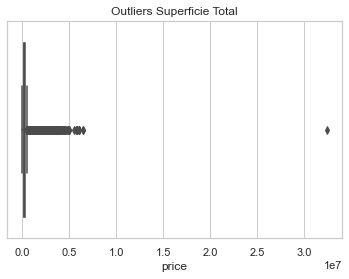

In [24]:
sns.set_theme(style="whitegrid")
tips = capfed
ax = sns.boxplot(x=tips["price"])
plt.title('Outliers Superficie Total')

Text(0.5, 1.0, 'cant de dormitorios')

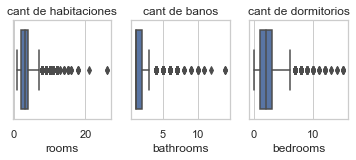

In [25]:
plt.subplot(2,3,1)
sns.boxplot(data=capfed,x='rooms')
plt.title('cant de habitaciones')
plt.subplot(2,3,2)
sns.boxplot(data=capfed,x='bathrooms')
plt.title('cant de banos')
plt.subplot(2,3,3)
sns.boxplot(data=capfed,x='bedrooms')
plt.title('cant de dormitorios')

Text(0.5, 1.0, 'cant de sup cubierta')

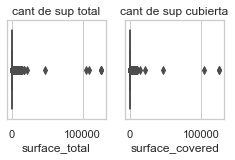

In [26]:
plt.subplot(2,3,1)
sns.boxplot(data=capfed,x='surface_total')
plt.title('cant de sup total')
plt.subplot(2,3,2)
sns.boxplot(data=capfed,x='surface_covered')
plt.title('cant de sup cubierta')


In [27]:
q1=capfed.price.quantile(0.25)
q3=capfed.price.quantile(0.75)
iqr=q3-q1
capfed=capfed[~((capfed.price<(q1-1.5*iqr))|
                (capfed.price>(q3+1.5*iqr)))]

Text(0.5, 1.0, 'Outliers Superficie Total')

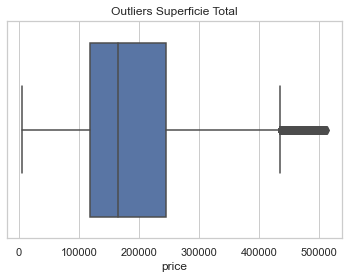

In [28]:
sns.set_theme(style="whitegrid")
tips = capfed
ax = sns.boxplot(x=tips["price"])
plt.title('Outliers Superficie Total')

In [29]:
q1=capfed.rooms.quantile(0.25)
q3=capfed.rooms.quantile(0.75)
iqr=q3-q1
capfed=capfed[~((capfed.rooms<(q1-1.5*iqr))|
                (capfed.rooms>(q3+1.5*iqr)))]

In [30]:
q1=capfed.bathrooms.quantile(0.25)
q3=capfed.bathrooms.quantile(0.75)
iqr=q3-q1
capfed=capfed[~((capfed.bathrooms<(q1-1.5*iqr))|
                (capfed.bathrooms>(q3+1.5*iqr)))]

In [31]:
q1=capfed.bedrooms.quantile(0.25)
q3=capfed.bedrooms.quantile(0.75)
iqr=q3-q1
capfed=capfed[~((capfed.bedrooms<(q1-1.5*iqr))|
                (capfed.bedrooms>(q3+1.5*iqr)))]

In [32]:
q1=capfed.surface_total.quantile(0.25)
q3=capfed.surface_total.quantile(0.75)
iqr=q3-q1
capfed=capfed[~((capfed.surface_total<(q1-1.5*iqr))|
                (capfed.surface_total>(q3+1.5*iqr)))]

In [33]:
q1=capfed.surface_covered.quantile(0.25)
q3=capfed.surface_covered.quantile(0.75)
iqr=q3-q1
capfed=capfed[~((capfed.surface_covered<(q1-1.5*iqr))|
                (capfed.surface_covered>(q3+1.5*iqr)))]

Text(0.5, 1.0, 'cant de dormitorios')

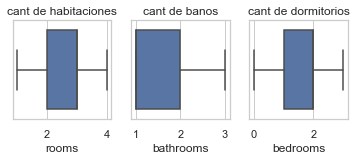

In [34]:
plt.subplot(2,3,1)
sns.boxplot(data=capfed,x='rooms')
plt.title('cant de habitaciones')
plt.subplot(2,3,2)
sns.boxplot(data=capfed,x='bathrooms')
plt.title('cant de banos')
plt.subplot(2,3,3)
sns.boxplot(data=capfed,x='bedrooms')
plt.title('cant de dormitorios')

Text(0.5, 1.0, 'cant de sup cubierta')

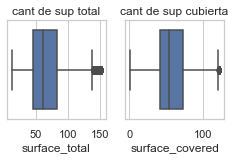

In [35]:
plt.subplot(2,3,1)
sns.boxplot(data=capfed,x='surface_total')
plt.title('cant de sup total')
plt.subplot(2,3,2)
sns.boxplot(data=capfed,x='surface_covered')
plt.title('cant de sup cubierta')

In [36]:
capfed.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,70744.000000,70744.000000,70744.000000,70744.000000,70744.000000,70744.000000
mean,2.541205,1.622837,1.285537,66.431711,58.574710,173001.379608
std,0.889145,0.765148,0.512156,26.457793,21.952613,82923.992027
min,1.000000,0.000000,1.000000,12.000000,1.000000,7500.000000
25%,2.000000,1.000000,1.000000,46.000000,41.133663,112000.000000
50%,3.000000,2.000000,1.000000,61.000000,54.000000,153598.000000
75%,3.000000,2.000000,2.000000,83.000000,73.000000,217000.000000
max,4.000000,3.000000,3.000000,152.000000,122.000000,513000.000000


Text(0.5, 1.0, 'Correlacion de todo el dataset')

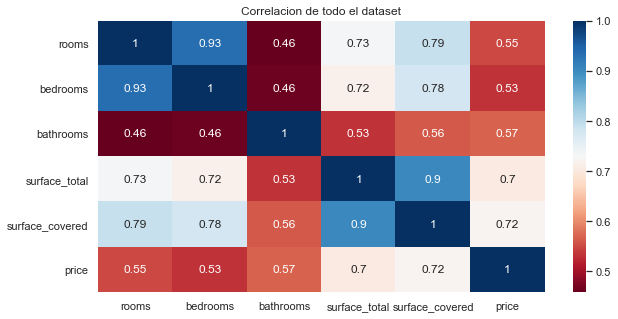

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(capfed.corr(),annot=True,cmap='RdBu')
plt.title('Correlacion de todo el dataset')

Correlaciones con el dataset limpio
- bedrooms y bathrooms tienen una correlacion positiva de 0.93
- segundo en importancia con un 0.90 sup cubierta y sup total
(estas correlaciones hacen sentido)
- cuartos y precio tiene una correlacion baja de 0.57, hubiera esperado que fuera mas alta.

In [38]:
#entender peso final de las propiedades en el dataset
capfed.property_type.value_counts()

Departamento    64232
PH               6193
Casa              319
Name: property_type, dtype: int64

In [39]:
capfed.shape

(70744, 8)

## Encoders

In [40]:
#Quiero entender cuales son las variables categoricas
capfed.dtypes

rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
l3                  object
property_type       object
dtype: object

In [41]:
s=(capfed.dtypes=='object')
object_col=list(s[s].index)
print('categorical values')
print(object_col)

categorical values
['l3', 'property_type']


In [42]:
capfed.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3,property_type
1,2.0,1.0,1.0,68.0,59.0,149000.0,Boedo,Departamento
2,2.0,1.0,1.0,50.0,44.0,115000.0,Boedo,Departamento
3,2.0,1.0,1.0,31.0,31.0,75000.0,Abasto,Departamento
4,1.0,1.0,1.0,22.0,22.0,48000.0,Abasto,Departamento
5,2.0,1.0,1.0,45.0,45.0,95000.0,Flores,Departamento


In [43]:
capfed.to_csv('capfed.csv')

In [44]:
del capfed

In [45]:
capfed = pd.read_csv('capfed.csv')
capfed.head()

,Unnamed: 0,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3,property_type
0,1,2.0,1.0,1.0,68.0,59.0,149000.0,Boedo,Departamento
1,2,2.0,1.0,1.0,50.0,44.0,115000.0,Boedo,Departamento
2,3,2.0,1.0,1.0,31.0,31.0,75000.0,Abasto,Departamento
3,4,1.0,1.0,1.0,22.0,22.0,48000.0,Abasto,Departamento
4,5,2.0,1.0,1.0,45.0,45.0,95000.0,Flores,Departamento


In [46]:
capfed.shape

(70744, 9)

Usamos dummies para las variables categoricas pasarlas a numero y poder entrenar mejor el modelo, entendiendo que el tipo de propiedad y la ubicación de la misma tienen algún tipo de influencia en el precio final de las distintas propiedades

In [47]:
dummies1 = pd.get_dummies(capfed, columns=['l3'])
dummies1.head()

,Unnamed: 0,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l3_Abasto,l3_Agronomía,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
0,1,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2.0,1.0,1.0,31.0,31.0,75000.0,Departamento,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1.0,1.0,1.0,22.0,22.0,48000.0,Departamento,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2.0,1.0,1.0,45.0,45.0,95000.0,Departamento,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
dummies1.shape

(70744, 65)

In [49]:
dummies2 = pd.get_dummies(dummies1, columns=['property_type'])
dummies2.head()

,Unnamed: 0,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Abasto,l3_Agronomía,l3_Almagro,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,1,2.0,1.0,1.0,68.0,59.0,149000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2.0,1.0,1.0,50.0,44.0,115000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,2.0,1.0,1.0,31.0,31.0,75000.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1.0,1.0,1.0,22.0,22.0,48000.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,2.0,1.0,1.0,45.0,45.0,95000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
dummies2.shape

(70744, 67)

In [51]:
dummies3=dummies2.drop(columns=['Unnamed: 0'])

In [52]:
dummies3.shape

(70744, 66)

In [53]:
dummies3.isna().sum()

rooms                         0
bedrooms                      0
bathrooms                     0
surface_total                 0
surface_covered               0
                             ..
l3_Villa Urquiza              0
l3_Villa del Parque           0
property_type_Casa            0
property_type_Departamento    0
property_type_PH              0
Length: 66, dtype: int64

## Escalado de datos

Las variables tienen unidades y medidas diferentes por ende las pasaremos a todas a la misma

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
#ss = StandardScaler()
#capfed3 = pd.DataFrame(ss.fit_transform(dummies3),columns = dummies3.columns)

In [56]:
media_rooms = dummies3.rooms.mean()
desv_rooms = dummies3.rooms.std()
dummies3['Datos_Escalados_Rooms'] = (dummies3.rooms - dummies3.rooms.mean())/dummies3.rooms.std(ddof=0)

media_bedrooms = dummies3.bedrooms.mean()
desv_bedrooms = dummies3.bedrooms.std()
dummies3['Datos_Escalados_Bedrooms'] = (dummies3.bedrooms - dummies3.bedrooms.mean())/dummies3.bedrooms.std(ddof=0)

media_bathrooms = dummies3.bathrooms.mean()
desv_bathrooms = dummies3.bathrooms.std()
dummies3['Datos_Escalados_Bathrooms'] = (dummies3.bathrooms - dummies3.bathrooms.mean())/dummies3.bathrooms.std(ddof=0)

media_surface_total = dummies3.surface_total.mean()
desv_surface_total = dummies3.surface_total.std()
dummies3['Datos_Escalados_Surface_Total'] = (dummies3.surface_total - dummies3.surface_total.mean())/dummies3.surface_total.std(ddof=0)

media_surface_covered = dummies3.surface_covered.mean()
desv_surface_covered = dummies3.surface_covered.std()
dummies3['Datos_Escalados_Surface_Covered'] = (dummies3.surface_covered - dummies3.surface_covered.mean())/dummies3.surface_covered.std(ddof=0)

#media_price = dummies3.price.mean()
#desv_price = dummies3.price.std()
#dummies3['Datos_Escalados_Price'] = (dummies3.price - dummies3.price.mean())/dummies3.price.std(ddof=0)

In [57]:
dummies3.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,...,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH,Datos_Escalados_Rooms,Datos_Escalados_Bedrooms,Datos_Escalados_Bathrooms,Datos_Escalados_Surface_Total,Datos_Escalados_Surface_Covered
0,2.0,1.0,1.0,68.0,59.0,149000.0,0,0,0,0,...,0,0,0,1,0,-0.608685,-0.814015,-0.557523,0.059276,0.019373
1,2.0,1.0,1.0,50.0,44.0,115000.0,0,0,0,0,...,0,0,0,1,0,-0.608685,-0.814015,-0.557523,-0.621058,-0.663922
2,2.0,1.0,1.0,31.0,31.0,75000.0,1,0,0,0,...,0,0,0,1,0,-0.608685,-0.814015,-0.557523,-1.339188,-1.256110
3,1.0,1.0,1.0,22.0,22.0,48000.0,1,0,0,0,...,0,0,0,1,0,-1.733369,-0.814015,-0.557523,-1.679355,-1.666087
4,2.0,1.0,1.0,45.0,45.0,95000.0,0,0,0,0,...,0,0,0,1,0,-0.608685,-0.814015,-0.557523,-0.810040,-0.618369


In [58]:
dummies3.shape

(70744, 71)

In [59]:
# Eliminación de las variables originales no escaladas
capfed3 = dummies3.drop(['rooms','bedrooms','bathrooms','surface_total','surface_covered'], axis=1) #ver si agrego 'price'
capfed3.shape

(70744, 66)

In [60]:
type(capfed3)

pandas.core.frame.DataFrame

In [61]:
capfed3.head()

,price,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,...,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH,Datos_Escalados_Rooms,Datos_Escalados_Bedrooms,Datos_Escalados_Bathrooms,Datos_Escalados_Surface_Total,Datos_Escalados_Surface_Covered
0,149000.0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.608685,-0.814015,-0.557523,0.059276,0.019373
1,115000.0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.608685,-0.814015,-0.557523,-0.621058,-0.663922
2,75000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-0.608685,-0.814015,-0.557523,-1.339188,-1.256110
3,48000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-1.733369,-0.814015,-0.557523,-1.679355,-1.666087
4,95000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-0.608685,-0.814015,-0.557523,-0.810040,-0.618369


## Reentrenamiento de modelos Sprint 1

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [63]:
#variables a predecir
X = capfed3.drop(['price'],axis=1)
y = capfed3.price

In [64]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.7, random_state = 42)

In [65]:
#Impresión de la distribución de los datos
print('Son {} datos para entrenamiento y {} datos para evaluación'.format(X_train.shape[0], X_test.shape[0]))

Son 49520 datos para entrenamiento y 21224 datos para evaluación


In [ ]:
#Definición de los modelos
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=20)

#Entrenamiento de los modelos
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

In [ ]:
#Evaluación de los modelos y entrenamiento
modelos = ['Regresión lineal','Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model,tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    #calculamos el error muestral
    print(f'Modelo con preprocesamiento de datos: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'r2 en Train: {r2_train}')
    print(f'r2 en Test: {r2_test}')

In [ ]:
#Gráfico de valores reales vs valores predichos para cada modelo
modelos = ['Regresión lineal','Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model,tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    plt.title(f'{modelos[i]}: Densidad de errores',fontsize=14)


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title(f'{modelos[i]}: Valores reales vs predichos',fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    print(f'Modelo: {modelos[i]}')

## Sprint 1 vs Sprint 2

Regresion lineal Sprint 1
- Raíz del error cuadrático medio en Train: 183329.0530509315
- Raíz del error cuadrático medio en Test: 202035.42637218724

Regresion lineal Sprint 2
- Raíz del error cuadrático medio en Train: 43206.13125519408
- Raíz del error cuadrático medio en Test: 42753.71400151132

Arbol de desiciion Sprint 1
- Raíz del error cuadrático medio en Train: 102330.82833845771
- Raíz del error cuadrático medio en Test: 158323.8144671286

Arbol de desiciion Sprint 2
- Raíz del error cuadrático medio en Train: 50962.224081265835
- Raíz del error cuadrático medio en Test: 50539.81622629072

KN Neighbours Sprint 1
- Raíz del error cuadrático medio en Train: 137458.03048357266
- Raíz del error cuadrático medio en Test: 166490.68927656364

KN Neighbours Sprint 2
- Raíz del error cuadrático medio en Train: 36844.67866927511
- Raíz del error cuadrático medio en Test: 38172.1047369364


Todos los modelos han mejorado sustancialmente en este segundo proyecto. confirmo mi hipotesis que decia que los filtros aplicados seguramente hacian que los errores medios sean tan altos

## Parte B Modelos Avanzados

## B.1 Regresion lineal Avanzada

In [66]:
#variables a predecir
X = capfed3.drop(['price'],axis=1)
y = capfed3.price

In [67]:
#División del dataset entre datos de entrenamiento y datos de testeo
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.7, random_state = 42)

In [68]:
from sklearn.linear_model import LinearRegression

In [71]:
reg_1 = LinearRegression()
reg_1.fit(X_train, y_train)
y_train_pred_1 = reg_1.predict(X_train)
y_test_pred_1 = reg_1.predict(X_test)

Raíz del error cuadrático medio en Train: 43206.13125519408
Raíz del error cuadrático medio en Test: 42753.71400151132
r2 en Train: 0.7304343503174586
r2 en Test: 0.7296163963433828


/Users/macarenatoledo/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macarenatoledo/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


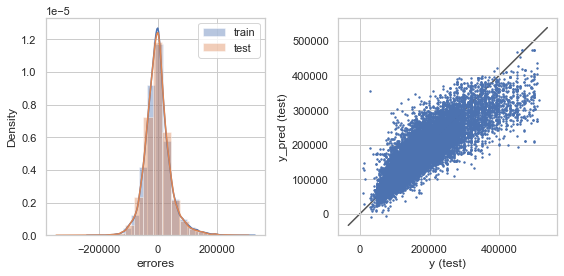

In [72]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

r2_train = r2_score(y_train, y_train_pred_1)
r2_test = r2_score(y_test, y_test_pred_1)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_1, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_1, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_1, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

## B.1.1 polynomial features

In [73]:
X = capfed3.drop(['price'],axis=1)
y = capfed3.price

In [74]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.7, random_state = 42)

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
poly = PolynomialFeatures() 
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)


(49520, 2211) (21224, 2211)


In [78]:
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)
print(reg_2.coef_, reg_2.intercept_)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

[-6.32282614e+11  4.87445896e+15  3.33563542e+15 ... -1.04056250e+04
  6.43425000e+03 -1.61675000e+03] 65319532378035.63


In [79]:
# Evaluación del modelo de regresión lineal
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_2))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

r2_train = r2_score(y_train, y_train_pred_2)
r2_test = r2_score(y_test, y_test_pred_2)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

Raíz del error cuadrático medio en Train: 40094.723096267706
Raíz del error cuadrático medio en Test: 1866808591212.485
r2 en Train: 0.7678609378099165
r2 en Test: -515504235981313.06


## B.1.2 Regularizacion - lasso

In [80]:
from sklearn.linear_model import Ridge, Lasso

In [81]:
X = capfed3.drop(['price'],axis=1)
y = capfed3.price

In [82]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.7, random_state = 42)

In [83]:
# Definición y entrenamiento de la regresión con regularización Lasso
reg_lasso = Lasso()
reg_lasso.fit(X_train_new,y_train)

# Impresión de los coeficientes del nuevo modelo
print(reg_lasso.coef_, reg_lasso.intercept_)
y_train_pred_lasso = reg_lasso.predict(X_train_new)
y_test_pred_lasso = reg_lasso.predict(X_test_new)

/Users/macarenatoledo/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32558924112862.906, tolerance: 34293108011.89244
  model = cd_fast.enet_coordinate_descent(


[     0.           4007.76102464   4632.65365246 ... -10390.8084305
   6380.37192941  -1570.55263068] 143663.8500011098


In [85]:
y_train_pred_lasso = reg_lasso.predict(X_train_new)
y_test_pred_lasso = reg_lasso.predict(X_test_new)

In [86]:
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_lasso}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_lasso}')

r2_train = r2_score(y_train, y_train_pred_lasso)
r2_test = r2_score(y_test, y_test_pred_lasso)
print(f'r2 cuadrático medio en Train: {r2_train}')
print(f'r2 medio en Test: {r2_test}')


Raíz del error cuadrático medio en Train: 40107.66809569124
Raíz del error cuadrático medio en Test: 39873.561374825076
r2 cuadrático medio en Train: 0.7677110165784733
r2 medio en Test: 0.764818741065109


## Conclusion Reg Avanzada

Vemos como con la regularizacion lasso mejora el r2 y el error cuadratico

## Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
#variables a predecir
X = capfed3.drop(['price'],axis=1)
y = capfed3.price

In [90]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.7, random_state = 42)

In [91]:
# Defición y entrenamiento del modelo
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [92]:
# Predicción de los valores tanto para train como para test
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

In [93]:
# Impresión de la importancia de cada variable en la tarea de regresión
rfr.feature_importances_

array([4.36616515e-04, 1.73395624e-04, 3.50552369e-03, 3.06438460e-03,
       1.76838810e-03, 1.16527047e-02, 2.30249616e-02, 7.78861478e-04,
       6.16461616e-04, 4.58982863e-03, 1.18681628e-05, 4.15456330e-04,
       8.52736225e-04, 1.80360411e-03, 3.79184592e-03, 7.71808272e-04,
       1.26775879e-03, 2.49548424e-03, 1.03538283e-03, 7.05607719e-03,
       1.15516577e-03, 8.70901586e-04, 6.87169393e-04, 5.78732962e-04,
       1.01324881e-02, 1.10466027e-03, 3.82582448e-02, 4.80986110e-04,
       1.14057256e-03, 1.03416138e-03, 4.50315238e-04, 4.57346322e-04,
       1.03593554e-03, 4.82868732e-04, 3.36386501e-02, 2.04683425e-02,
       2.67152734e-03, 1.73004511e-03, 1.63181319e-03, 7.86836885e-04,
       1.02159359e-03, 1.88365057e-04, 1.42384128e-04, 1.71712113e-04,
       2.91744081e-03, 2.02785581e-03, 2.06022486e-04, 3.07526913e-03,
       6.84959672e-04, 5.39402220e-04, 7.30915990e-04, 3.05589374e-04,
       2.07501555e-04, 2.46471408e-04, 6.25429319e-04, 6.51183974e-03,
      

/Users/macarenatoledo/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


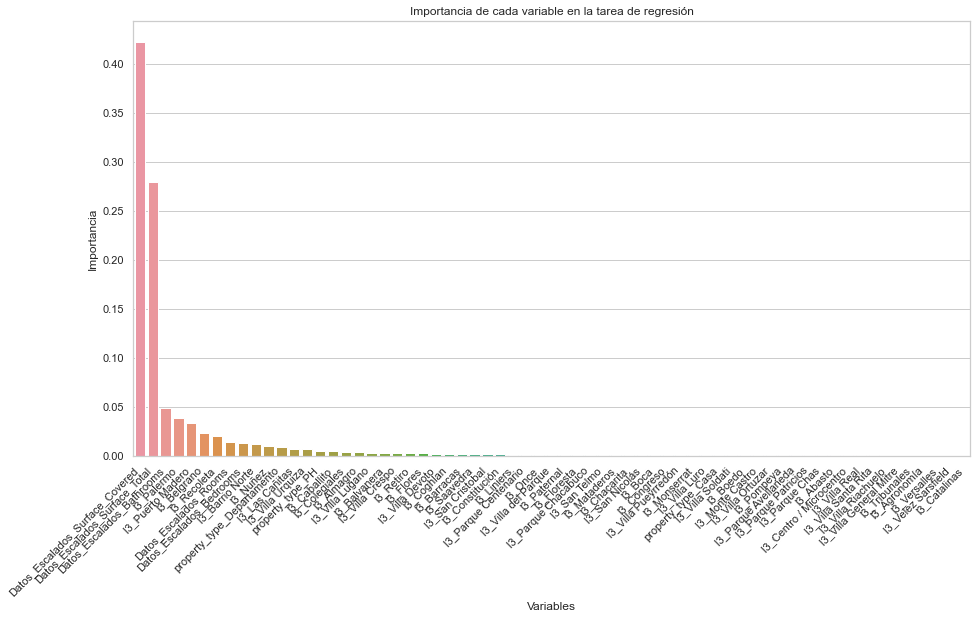

In [95]:
# Gráfico de la importancia de cada variable en la tarea de regresión
importances = rfr.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
plt.title ('Importancia de cada variable en la tarea de regresión')
plt.ylabel('Importancia')
plt.xlabel('Variables')
chart = sns.barplot(columns[indices], importances[indices])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

In [96]:
#Evaluación del Random Forest

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

Raíz del error cuadrático medio en Train: 20807.913226350098
Raíz del error cuadrático medio en Test: 32488.5864431319
r2 en Train: 0.9374782904105119
r2 en Test: 0.8438671496151176


/Users/macarenatoledo/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macarenatoledo/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


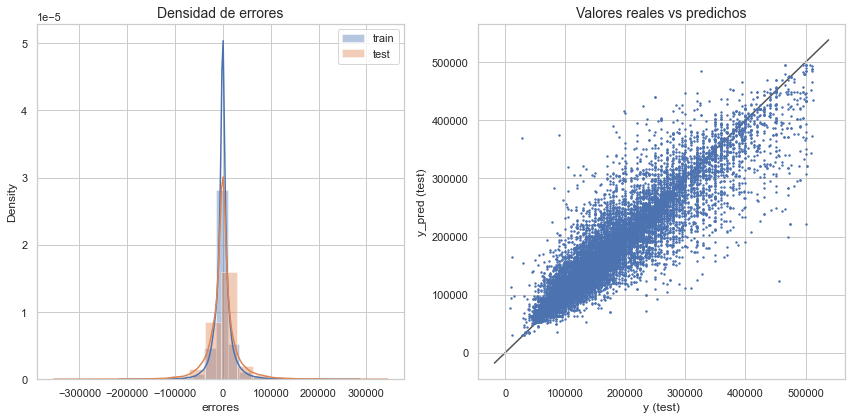

In [100]:
#Gráfico de valores reales vs valores predichos para el Random Forest con hiperparámetros iniciales
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()
plt.title('Densidad de errores',fontsize=14)


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),
np.max([ax.get_xlim(), ax.get_ylim()]),
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.title('Valores reales vs predichos',fontsize=14)
    
plt.tight_layout()
plt.show()
    


## validacion cruzada

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


In [102]:
# Definición del modelo y la validación cruzada
rfr = RandomForestRegressor()
rfr_scores = cross_val_score(rfr, X, y, cv=5)

In [103]:
# Evaluación de la validación cruzada
rfr_scores = cross_validate(rfr, X, y, cv=5)
print(rfr_scores)

{'fit_time': array([36.41439772, 37.20085287, 35.75134706, 36.24826288, 33.63332701]), 'score_time': array([0.55435514, 0.53096032, 0.54420924, 0.52321672, 0.49713206]), 'test_score': array([0.85114529, 0.85108484, 0.84470996, 0.79977649, 0.73119914])}


In [104]:
# Evaluación del modelo en base a la validación cruzada y la cantidad de estimadores
rfr_train_scores_mean = []
rfr_train_scores_std = []
rfr_test_scores_mean = []
rfr_test_scores_std = []

estimators = np.arange(1, 50, 1)

for estimator in estimators:
    rfr = RandomForestRegressor(n_estimators=estimator)
    rfr_scores = cross_validate(rfr, X, y, cv=5, return_train_score=True, n_jobs=-1)
    
    rfr_train_scores_mean.append(rfr_scores['train_score'].mean())
    rfr_train_scores_std.append(rfr_scores['train_score'].std())
    
    rfr_test_scores_mean.append(rfr_scores['test_score'].mean())
    rfr_test_scores_std.append(rfr_scores['test_score'].std())

rfr_train_scores_mean = np.array(rfr_train_scores_mean)
rfr_train_scores_std = np.array(rfr_train_scores_std)
rfr_test_scores_mean = np.array(rfr_test_scores_mean)
rfr_test_scores_std = np.array(rfr_test_scores_std)

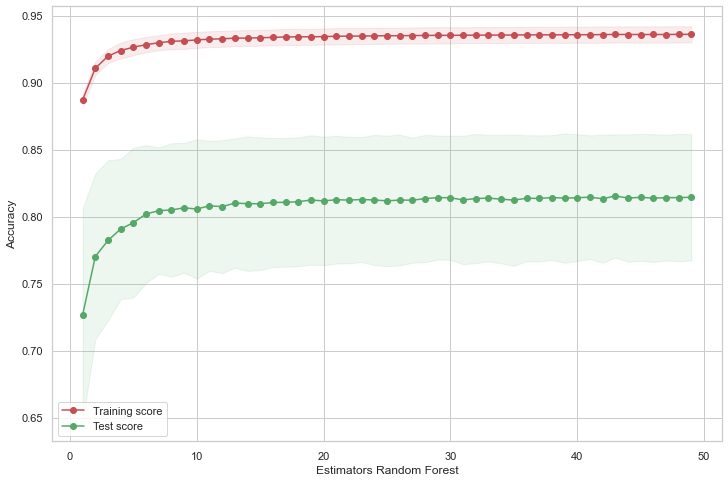

In [118]:
# Gráfico de la evaluación del modelo en base a la validación cruzada y la cantidad de estimadores
plt.figure(figsize=(12, 8))
plt.fill_between(estimators, rfr_train_scores_mean - rfr_train_scores_std,
                 rfr_train_scores_mean + rfr_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(estimators, rfr_test_scores_mean - rfr_test_scores_std,
                 rfr_test_scores_mean + rfr_test_scores_std, alpha=0.1, color="g")
plt.plot(estimators, rfr_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(estimators, rfr_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Estimators Random Forest')
plt.show()

Análisis

El número apropiado de estimadores sería 10, debido a que a partir de ese número el coeficiente de determinación parece estabilizarse, es decir que a mayor cantidad de estimadores mayor costo computacional sin una mejora real en el desempeño del modelo

## random Search

In [124]:
import scipy as sp
from sklearn.model_selection import RandomizedSearchCV


In [119]:
#variables a predecir
X = capfed3.drop(['price'],axis=1)
y = capfed3.price

In [120]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.7, random_state = 42)

In [125]:
# Grilla para Random Search
param_dist = {'n_estimators':sp.stats.randint(1, 10),
              'criterion': ['mse', 'mae'], 
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[2,3,4]}

In [127]:
# Definición del random search
model = RandomizedSearchCV(rfr, param_dist,n_iter=5, random_state=0, cv=5,n_jobs=-1,verbose=5)

#Entrenamiento del random forest con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=49),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fab99fd6f70>},
                   random_state=0, verbose=5)

In [128]:
# Impresión de los mejores parámetros para el modelo de random forest
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'criterion': 'mse', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 9}
Mejor Score: 0.8139438022283049



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.100363,1.172323,0.250233,0.109323,mse,3,2,4,"{'criterion': 'mse', 'min_samples_leaf': 3, 'm...",0.795882,0.812243,0.806301,0.810889,0.812613,0.807585,0.006269,3
1,2024.965828,116.643640,0.116923,0.044088,mae,3,3,3,"{'criterion': 'mae', 'min_samples_leaf': 3, 'm...",0.781930,0.791112,0.792122,0.792887,0.801908,0.791992,0.006343,4
2,6.776115,0.373300,0.092349,0.017541,mse,4,2,9,"{'criterion': 'mse', 'min_samples_leaf': 4, 'm...",0.804027,0.818260,0.811052,0.815778,0.820603,0.813944,0.005883,1
3,5.047874,0.245942,0.065678,0.007251,mse,4,3,7,"{'criterion': 'mse', 'min_samples_leaf': 4, 'm...",0.801263,0.816359,0.808443,0.811494,0.819627,0.811437,0.006384,2
4,1416.839933,272.603530,0.078147,0.037622,mae,4,2,2,"{'criterion': 'mae', 'min_samples_leaf': 4, 'm...",0.762858,0.771290,0.771857,0.781178,0.782971,0.774031,0.007322,5


In [129]:
#Evaluación del Random Forest con Random Search y Validación Cruzada
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'r2 en Train: {r2_train}')
print(f'r2 en Test: {r2_test}')

Raíz del error cuadrático medio en Train: 29134.893515399795
Raíz del error cuadrático medio en Test: 34606.3596944309
r2 en Train: 0.8774253508214144
r2 en Test: 0.8228486397093764


/Users/macarenatoledo/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macarenatoledo/opt/miniconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


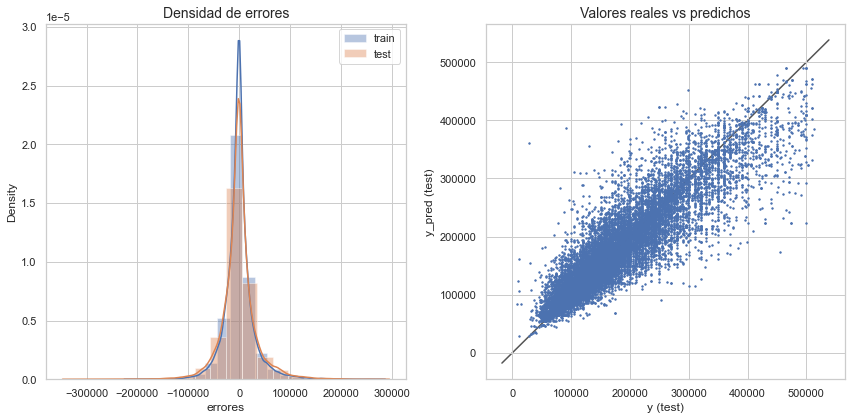

Modelo: Vecinos más cercanos


In [130]:
#Gráfico de valores reales vs valores predichos para el Random Forest con hiperparámetros iniciales
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()
plt.title('Densidad de errores',fontsize=14)


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),
np.max([ax.get_xlim(), ax.get_ylim()]),
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.title('Valores reales vs predichos',fontsize=14)
    
plt.tight_layout()
plt.show()


## Conclusion Parte B - Modelos

Regresion lineal
- r2 en Train: 0.7304343503174586
- r2 en Test: 0.7296163963433828

Arbol de Desicion
- r2 en Train: 0.6249660924729574
- r2 en Test: 0.6221669245333951

KN Neighbours
- r2 en Train: 0.8039696410060062
- r2 en Test: 0.7844614930714249

Regresion lineal avanzada - reg lasso
- r2 cuadrático medio en Train: 0.7677110165784733
- r2 medio en Test: 0.764818741065109

Random Forest
- r2 en Train: 0.9372543521399055
- r2 en Test: 0.8435638155182659

De los 5 modelos realizados el que mejor resultado otorga es el de Random forest

# PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

- ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no?

Similar al proyecto anterior, las variables relacionadas con la superficie (surface_total y surface_covered) fueron las más relevantes.

Gracias a aplicar los dummies puedo ver que algunos de los barrios como Palermo/Pto Madero/Belgrano tienen relevancia en la prediccion. En cambio los tipos de propiedades no parecen tener mucha capacidad de prediccion (se encuentran en el top15 en importancia de cada variable)

- ¿Coincide con lo que esperabas a partir de tu experiencia con este dataset?

En general, considero que coincide. La principal inquietud al finalizar el proyecto anterior era la utilización de los barrios como variables. Como se menciona arriba, los barrios parecieran tener algún tipo de influencia en el precio final de la propiedad.